# Training, Tuning, and Evaluating Models in Python

In this notebook, we will demonstrate:
1. How to train and evaluate models using scikit-learn `model.fit` and `model.predict`.
2. Great way to tune hyperparameters using `GridSearchCV`.

We will use a dataset with both categorical and numerical features to showcase preprocessing steps, model training, and evaluation.

If you don't have the following packages installed, delete the # and run the cell.

In [49]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install sci-kit learn 

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [80]:
# Load Titanic dataset 
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Select features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

#### Response

- `Survived`: ***[int64]*** - Survival (0 = No, 1 = Yes)


#### Features

- `Pclass`: ***[int64]*** - Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)
- `Sex`: ***[object]*** - Sex (male, female)
- `Age`: ***[float64]*** - Age (in years)
- `SibSp`: ***[int64]*** - Number of Siblings/Spouses Aboard
- `Parch`: ***[int64]*** - Number of Parents/Children Aboard
- `Fare`: ***[float64]*** - Fare (in British pounds)

In [52]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [53]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [54]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
X['Sex'].unique()

array(['male', 'female'], dtype=object)

In [56]:
X['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [ ]:
# One-hot encode categorical variables ('Sex' and 'Pclass') to prepare for model training
encoder = ...
encoded_categorical = encoder.fit_transform(X[['Sex', 'Pclass']])

In [58]:
encoded_categorical

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1782 stored elements and shape (891, 5)>

Note: you may want to try keeping an ordinal encoding for class since it does have an inherent order, but for this example we will use one-hot encoding

In [59]:
encoded_categorical_df = pd.DataFrame.sparse.from_spmatrix(encoded_categorical, columns=encoder.get_feature_names_out(['Sex', 'Pclass']))
encoded_categorical_df 

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,1.0,0,0,1.0
1,1.0,0,1.0,0,0
2,1.0,0,0,0,1.0
3,1.0,0,1.0,0,0
4,0,1.0,0,0,1.0
...,...,...,...,...,...
886,0,1.0,0,1.0,0
887,1.0,0,1.0,0,0
888,1.0,0,0,0,1.0
889,0,1.0,1.0,0,0


In [60]:
X = pd.concat([X.drop(columns=['Sex', 'Pclass']), encoded_categorical_df], axis=1)
X.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,0,1.0,0,0,1.0
1,38.0,1,0,71.2833,1.0,0,1.0,0,0
2,26.0,0,0,7.9250,1.0,0,0,0,1.0
3,35.0,1,0,53.1000,1.0,0,1.0,0,0
4,35.0,0,0,8.0500,0,1.0,0,0,1.0


In [61]:
X.isna().sum()

C:\Users\larat\AppData\Local\Temp\ipykernel_8904\2101464722.py:1: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X.isna().sum()


Age             177
SibSp             0
Parch             0
Fare              0
Sex_female    False
Sex_male      False
Pclass_1      False
Pclass_2      False
Pclass_3      False
dtype: Sparse[int64, False]

In [62]:
y.isna().sum()

0

In [ ]:
imputer = ...
X[['Age']] = imputer.fit_transform(X[['Age']])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Initialize model
log_reg = LogisticRegression(max_iter=1000)

# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Logistic Regression
Accuracy: 0.8044692737430168


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


array([[92, 13],
       [22, 52]], dtype=int64)

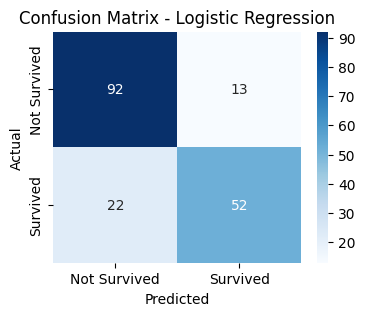

In [66]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
# Initialize model
decision_tree = ...

# Train and evaluate Decision Tree
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_decision_tree))

Accuracy: 0.8044692737430168


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
# Initialize model
knn = ...

# Train and evaluate KNN
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.7150837988826816


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## What is GridSearchCV?

GridSearchCV is a tool in scikit-learn for **hyperparameter tuning**, which finds the best combination of hyperparameters (e.g., `n_neighbors` in KNN, `max_depth` in decision trees) to improve model performance.

### How It Works:
1. **Define a Parameter Grid**: Specify ranges for hyperparameters.
2. **Cross-Validation**: Train and evaluate the model on multiple data splits for each combination.
3. **Select Best Parameters**: Choose the combination with the best performance.

Next, we’ll use GridSearchCV to tune a model and evaluate its performance!


In [75]:
# let's redefine our X and y
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Define preprocessing for numerical and categorical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Pclass']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler())  # Decision Trees do not improve with scaling, but other models like KNN often do.
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'tree__max_depth': [3, 5, 10, None],
    'tree__min_samples_split': [2, 5, 10],
}

# Create a pipeline with the preprocessor and Decision Tree model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier()),
])

# Set up GridSearchCV with the pipeline and parameter grid
grid_search = ...

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'tree__max_depth': 3, 'tree__min_samples_split': 2}
Best Cross-Validation Score: -0.42549193929817075
Test Accuracy: 0.7988826815642458
